# Hypothesis 2: If any of the exoplanets possesses similar conditions in which an Extremophile can survive, then those planets could potentially host life.

Based on the analysis done in Hypothesis one, we have all potentially habitable planets which in theory should sustain life. 

In [18]:
import data_analysis
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib_venn as vplt
pd.set_option('max_colwidth', 800)

Extracting data from the analysis to get extremophiles that can survive extreme Temperatures, Pressures and Radiation.

In [2]:
exoplanets_catalog_esi = data_analysis.calculate_ESI(data_analysis.create_exoplanets_catalog(".\\data\\phl_exoplanet_catalog.csv"))
potentially_habitable_exoplanets = exoplanets_catalog_esi.loc[(exoplanets_catalog_esi['P_calculated_ESI'] >= 0.6)]
surviving_extremophiles = data_analysis.identifying_surviving_extremophiles(".\\data\\Extremophiles Range.csv", potentially_habitable_exoplanets)

temperature_surviving_extremophiles = surviving_extremophiles[0]
pressure_surviving_extremophiles = surviving_extremophiles[1]
radiation_surviving_extremophiles = surviving_extremophiles[2]

## Thermophiles - Extremophiles that can survive Extreme Temperatures

Here is a plot of extremophiles that can surive Extreme Temperatures ranging from 275K (1.85°C or 35.33°F) to 395K (121.85°C or 251.33°F)

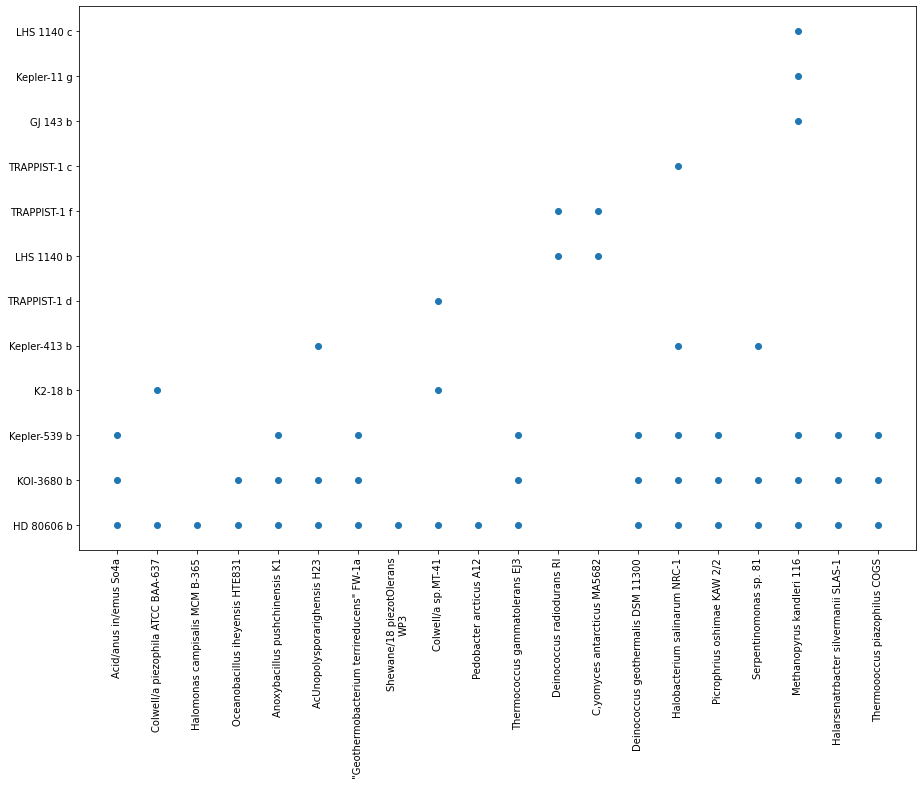

In [3]:
fig, ax = plt.subplots()
ax.scatter(temperature_surviving_extremophiles.Strain, temperature_surviving_extremophiles.P_NAME, )
fig.set_size_inches(15, 10)
plt.xticks(rotation = 90)
plt.show()

## Piezophiles or Vaccum Tolerants - Extremophiles that can survive Extreme Pressures

Here is a plot of extremophiles that can surive Extreme Pressures ranging from 0.01 Bar to 1250 Bar. For Comparison Earth's Surface Pressure is 1.013 Bar

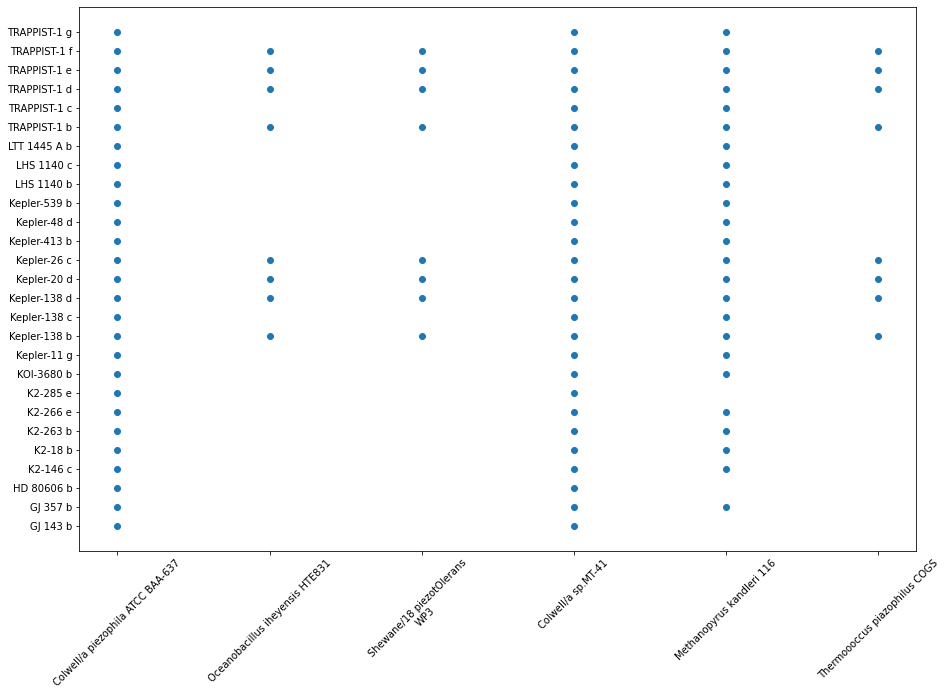

In [5]:
fig, ax = plt.subplots()
ax.scatter(pressure_surviving_extremophiles.Strain, pressure_surviving_extremophiles.P_NAME)
fig.set_size_inches(15, 10)
plt.xticks(rotation = 45)
plt.show()

## Gammatolerans - Extremophiles that can survive Extreme Radiation

Here is a plot of extremophiles that can surive Extreme Radiation from stellar flux ranging upto 5000 W/m^2. 

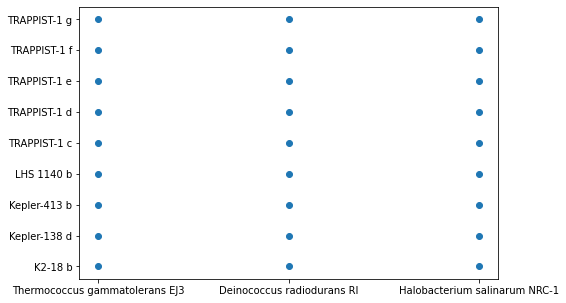

In [6]:
fig, ax = plt.subplots()
ax.scatter(radiation_surviving_extremophiles.Strain, radiation_surviving_extremophiles.P_NAME)
fig.set_size_inches(7.5, 5)
plt.show()

### A Venn diagram combining all three types of extremophiles

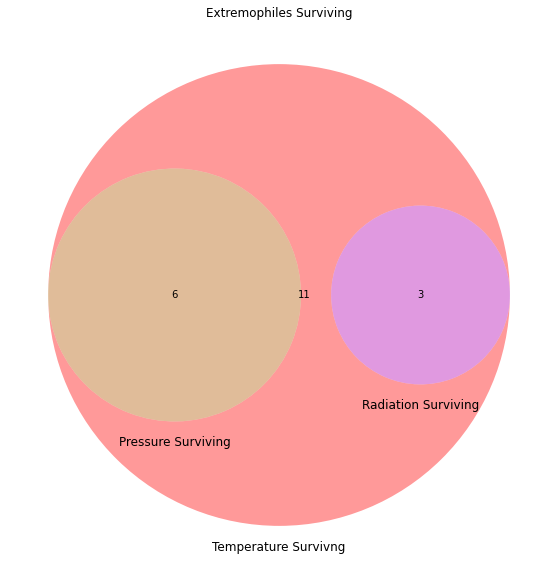

In [21]:
temperature_surviving_extremophiles = temperature_surviving_extremophiles.groupby('Strain').agg({'P_NAME': lambda x: ', '.join(x)})
pressure_surviving_extremophiles = pressure_surviving_extremophiles.groupby('Strain').agg({'P_NAME': lambda x: ', '.join(x)})
radiation_surviving_extremophiles = radiation_surviving_extremophiles.groupby('Strain').agg({'P_NAME': lambda x: ', '.join(x)})

plt.figure(figsize=(10,10))
plt.title("Extremophiles Surviving")
v = vplt.venn3([set(temperature_surviving_extremophiles.index.to_list()), 
       set(pressure_surviving_extremophiles.index.to_list()), 
       set(radiation_surviving_extremophiles.index.to_list()), 
      ],
       set_labels=('Temperature Survivng', 'Pressure Surviving', 'Radiation Surviving')
     )
plt.show()

As seen here, all Extremophiles that can survive extreme temperatures can survive extreme pressures and extreme radiation. But, there is no overlap between Piezophiles and Gammatolerans.

## Conclusion

Since there is no overlap between all three parameters considered, there are no potentially habitable exoplanets where an extremophile can survive given all three conditions. Hence proving our hypothesis false.  